# NLP with Disaster Tweets 

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import gc
import re
import string
import operator
from collections import defaultdict

from wordcloud import STOPWORDS

In [65]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [66]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [67]:
print(df_train.shape, df_test.shape)

(7613, 5) (3263, 4)


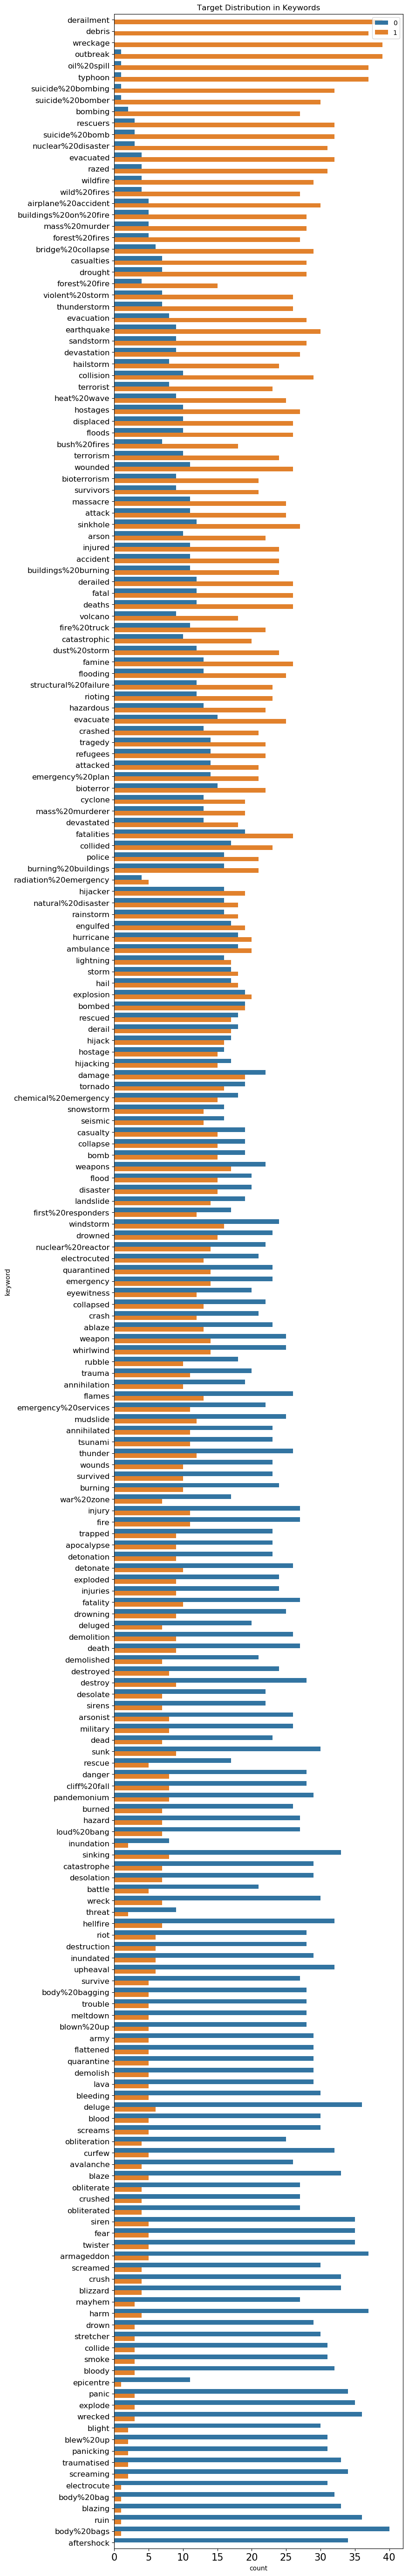

In [68]:
df_train['target_mean'] = df_train.groupby('keyword')['target'].transform('mean')

fig = plt.figure(figsize=(8, 72), dpi=100)

sns.countplot(y=df_train.sort_values(by='target_mean', ascending=False)['keyword'], 
             hue=df_train.sort_values(by='target_mean', ascending=False)['target'])

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()

df_train.drop(columns=['target_mean'], inplace=True)

#### Train and testing sets have nearly similar missing values.  So they can be taken from the same sample.

In [69]:
train_missing = df_train.isna().sum()
test_missing = df_test.isna().sum()

train_miss_percent = train_missing/df_train.shape[0]
test_miss_percent = test_missing/df_test.shape[0]

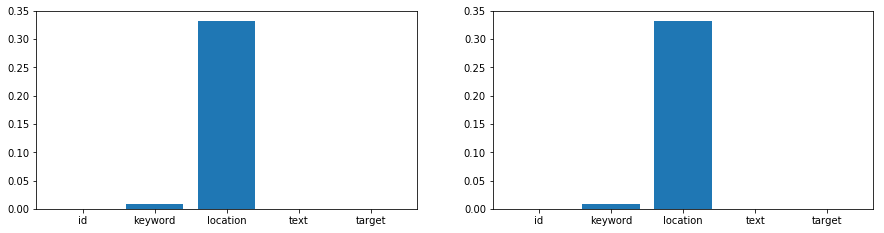

In [70]:
plt.figure(1, figsize=(15, 8))
plt.subplot(2, 2, 1)
plt.bar(df_train.columns, train_miss_percent)
plt.subplot(2, 2, 2)
plt.bar(df_train.columns, train_miss_percent)
plt.show()

## New Generated Features

* `word_count` number of words in text
* `unique_word_count` number of unique words in text
* `stop_word_count` number of stop words in text
* `url_count` number of urls in text
* `mean_word_length` average character count in words
* `char_count` number of characters in text
* `punctuation_count` number of punctuations in text
* `hashtag_count` number of hashtags (#) in text
* `mention_count` number of mentions (@) in text

In [126]:
df_train['word_count'] = df_train['text'].apply(lambda x: len(x.split()))
df_test['word_count'] = df_test['text'].apply(lambda x: len(x.split()))

In [127]:
df_train['unique_word_count'] = df_train['text'].apply(lambda x: len(set(str(x).split())))
df_test['unique_word_count'] = df_test['text'].apply(lambda x: len(set(str(x).split())))

In [128]:
df_train['stop_word_count'] = df_train['text'].apply(lambda x: len([i for i in str(x).lower().split() if i in STOPWORDS]))
df_test['stop_word_count'] = df_test['text'].apply(lambda x: len([i for i in str(x).lower().split() if i in STOPWORDS]))

In [129]:
df_train['url_count'] = df_train['text'].apply(lambda x: len([i for i in str(x).lower().split() if 'http' in i or 'https' in i]))
df_test['url_count'] = df_test['text'].apply(lambda x: len([i for i in str(x).lower().split() if 'http' in i or 'https' in i]))

In [130]:
df_train['mean_word_length'] = df_train['text'].apply(lambda x: np.mean([len(i) for i in str(x).split()]))
df_test['mean_word_length'] = df_test['text'].apply(lambda x: np.mean([len(i) for i in str(x).split()]))

In [131]:
df_train['char_count'] = df_train['text'].apply(lambda x: len(str(x)))
df_test['char_count'] = df_test['text'].apply(lambda x: len(str(x)))

In [132]:
df_train['punctuation_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_test['punctuation_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [133]:
df_train['hashtag_count'] = df_train['text'].apply(lambda x: len([i for i in str(x) if i=="#"]))
df_test['hashtag_count'] = df_test['text'].apply(lambda x: len([i for i in str(x) if i=="#"]))

In [134]:
df_train['mention_count'] = df_train['text'].apply(lambda x: len([i for i in str(x) if i=="@"]))
df_test['mention_count'] = df_test['text'].apply(lambda x: len([i for i in str(x) if i=="@"]))

## Plots

In [140]:
new_features = ['word_count', 'unique_word_count', 'stop_word_count', 
                'url_count', 'mean_word_length', 'char_count', 
                'punctuation_count', 'hashtag_count', 'mention_count']

In [141]:
disaster_tweet = df_train['target'] == 1

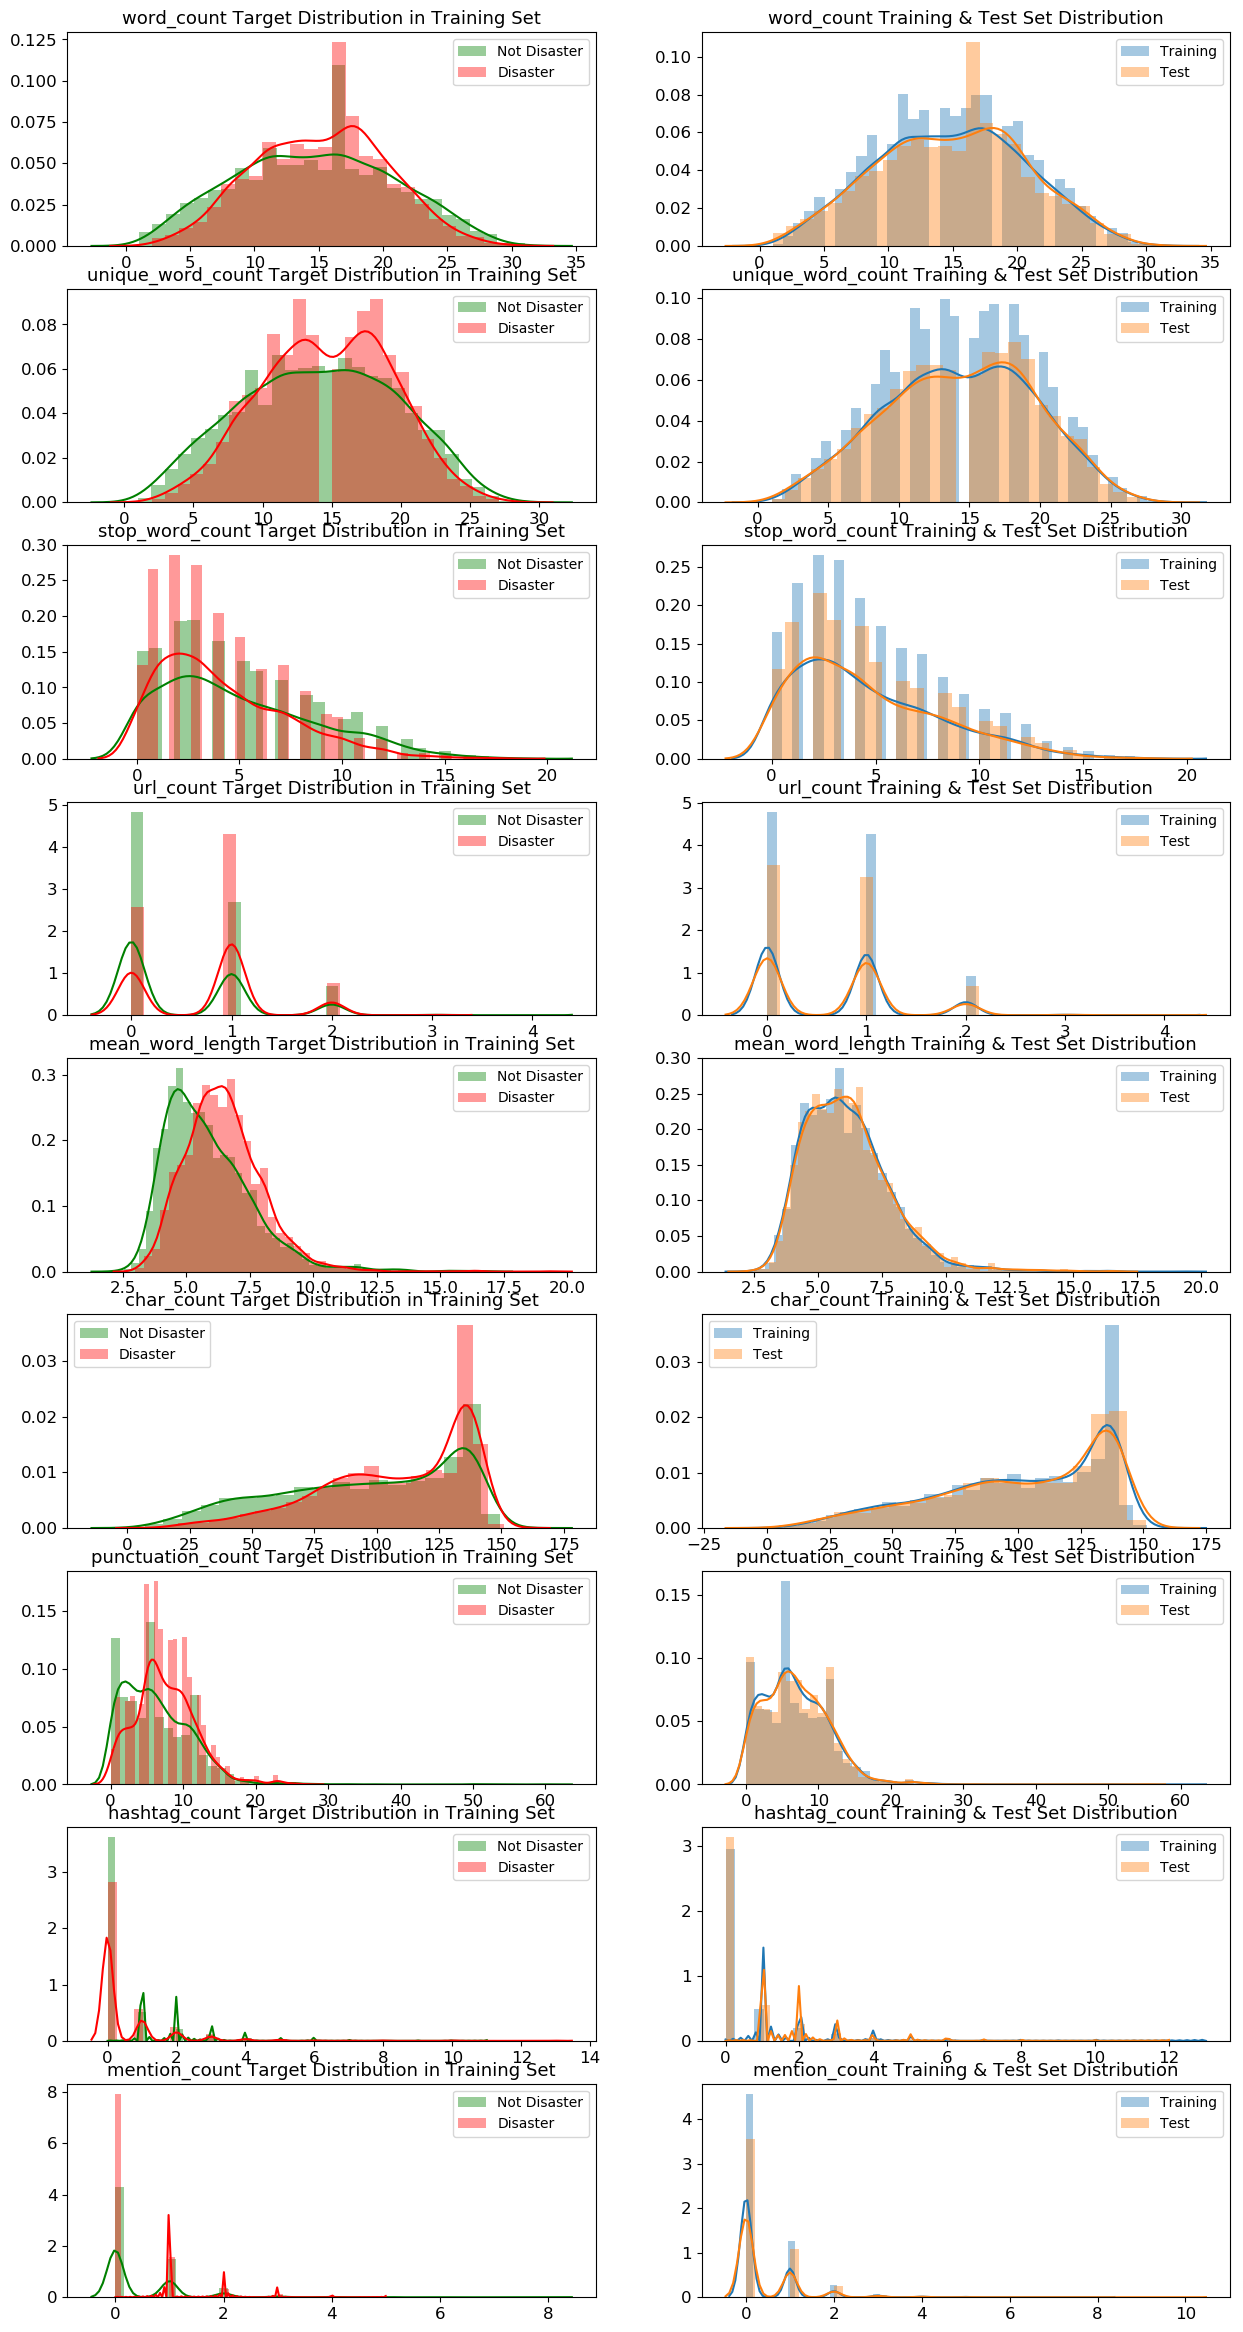

In [152]:
fig, axes = plt.subplots(ncols=2, nrows=len(new_features), figsize=(15, 30), dpi=100)

for i, feature in enumerate(new_features):
    sns.distplot(df_train.loc[~disaster_tweet][feature], label='Not Disaster', ax=axes[i][0], color='green')
    sns.distplot(df_train.loc[disaster_tweet][feature], label='Disaster', ax=axes[i][0], color='red')

    sns.distplot(df_train[feature], label='Training', ax=axes[i][1])
    sns.distplot(df_test[feature], label='Test', ax=axes[i][1])
    
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

plt.show()

In [153]:
import jovian
jovian.commit()

  Found existing installation: jovian 0.2.5
    Uninstalling jovian-0.2.5:
      Successfully uninstalled jovian-0.2.5


<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "paras009/nlp-with-disaster-tweets" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ml/paras009/nlp-with-disaster-tweets
